In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import threading

In [2]:
name = 'Scalextric.xlsx'
count = 0
archivos = os.listdir()
for i in archivos:
  if (i == name):
    count = 1
if (count == 0):
  df = pd.DataFrame(columns=['Jugador', 'Coche', 'NVueltas', 'Tiempo', 'Media'])
  df.to_excel(name)
df = pd.read_excel(name)
df.drop(columns= ['Unnamed: 0'], inplace = True)

In [3]:
jugadores = {}
x, y = '', ''
while (1):
    print('Introduce un jugador y su coche. f para finalizar')
    x = input()
    if x == 'f':
        break
    y = input()
    jugadores[x] = y

Introduce un jugador y su coche. f para finalizar
raul
ferrari
Introduce un jugador y su coche. f para finalizar
mario
seat
Introduce un jugador y su coche. f para finalizar
f


In [4]:
aux = pd.DataFrame(columns=df.columns)
aux['Jugador'] = jugadores.keys()
aux['Coche'] = jugadores.values()
df = pd.concat([df,aux], sort = True)

In [5]:
def comb (n):
    return n*n-n

In [6]:
nVueltas, tiempo, jug, rival, vRapida = [], [], [], [], []

In [7]:
def insertar_datos():
    for i in range(2*comb(len(df['Jugador']))):
        print('Cambioooo' + str(i))
        print('Pista 1')
        j1 = input()
        if j1 not in list(df['Jugador']):
            print('Jugador no registrado')
            i =- 1
            continue
        print('Pista 2')
        j2 = input()
        if j2 not in list(df['Jugador']):
            print('Jugador no registrado')
            i =- 1
            continue
        jug.append(j1)
        jug.append(j2)
        print('Tiempo de ' + jug[-2])
        tiempo.append(float(input()))
        print('NVueltas de ' + jug[-2])
        nVueltas.append(float(input()))
        print('vRapida de ' + jug[-2])
        vRapida.append(float(input()))
        print('Tiempo de ' + jug[-1])
        tiempo.append(float(input()))
        print('NVueltas de ' + jug[-1])
        nVueltas.append(float(input()))
        print('vRapida de ' + jug[-1])
        vRapida.append(float(input()))
        rival.append(jug[-1])
        rival.append(jug[-2])
        
        #barrera.wait()

In [8]:
df2 = pd.DataFrame(columns = ['Jug', 'Rival', 'nVueltas', 'tiempo', 'vRapida'])
def adjuntar_datos():
    df2['Jug'] = jug
    df2['Rival'] = rival
    df2['nVueltas'] = nVueltas
    df2['tiempo'] = tiempo
    df2['vRapida'] = vRapida

In [9]:
def mostrar_datos():
    j = 1
    for i in df2['Jug'].unique():
        plt.subplot(1,3,j)
        plt.title(i)
        plt.ylim(df2['nVueltas'].min()-1,df2['nVueltas'].max()+1)
        plt.bar(df2.groupby('Jug').get_group(i)['Rival'], df2.groupby('Jug').get_group(i)['nVueltas'])
        j += 1
    plt.show()

In [10]:
#hilo1 = threading.Thread(target=insertar_datos)
#hilo2 = threading.Thread(target=mostrar_datos)
#hilo3 = threading.Thread(target=adjuntar_datos)

#barrera = threading.Barrier(3)

In [11]:
#hilo1.start()
#hilo2.start()
#hilo3.start()
#hilo1.join()
#hilo2.join()
#hilo3.join()

In [12]:
insertar_datos()

Cambioooo0
Pista 1
mario
Pista 2
raul
Tiempo de mario
1
NVueltas de mario
1
vRapida de mario
1
Tiempo de raul
2
NVueltas de raul
2
vRapida de raul
2
Cambioooo1
Pista 1
mario
Pista 2
raul
Tiempo de mario
3
NVueltas de mario
3
vRapida de mario
3
Tiempo de raul
4
NVueltas de raul
4
vRapida de raul
4
Cambioooo2
Pista 1


KeyboardInterrupt: Interrupted by user

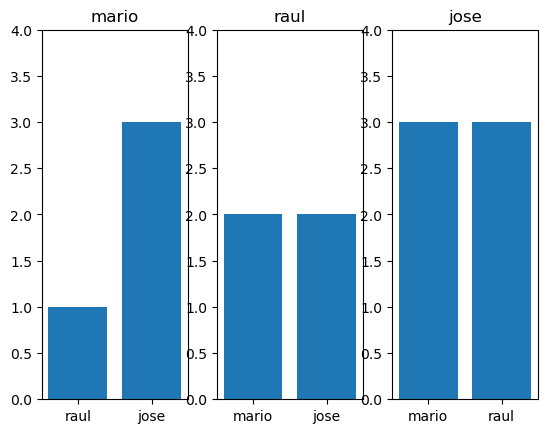

In [17]:
adjuntar_datos()
mostrar_datos()

In [32]:
df.index = df['Jugador']
for i in df2['Jug'].unique():
    df.iloc[df.index.get_indexer([i]), df.columns.get_indexer(["NVueltas"])] = df2.groupby('Jug').get_group(i)['nVueltas'].sum()
    df.iloc[df.index.get_indexer([i]), df.columns.get_indexer(["Tiempo"])] = df2.groupby('Jug').get_group(i)['tiempo'].sum()
    df.iloc[df.index.get_indexer([i]), df.columns.get_indexer(["Media"])] = df2.groupby('Jug').get_group(i)['tiempo'].mean()
    print(df)

           Coche Jugador     Media NVueltas Tiempo
Jugador                                           
raul     ferrari    raul       NaN      NaN    NaN
mario       fiat   mario  1.333333      8.0    8.0
jose        seat    jose  2.333333     14.0   14.0
           Coche Jugador     Media NVueltas Tiempo
Jugador                                           
raul     ferrari    raul      1.75      7.0    7.0
mario       fiat   mario  1.333333      8.0    8.0
jose        seat    jose  2.333333     14.0   14.0
           Coche Jugador     Media NVueltas Tiempo
Jugador                                           
raul     ferrari    raul      1.75      7.0    7.0
mario       fiat   mario  1.333333      8.0    8.0
jose        seat    jose  2.333333     14.0   14.0


In [22]:
df.to_excel(name)

In [31]:
df.index = df['Jugador']
df.index.get_indexer(['mario'])

array([1], dtype=int64)

In [23]:
df2

,Jug,Rival,nVueltas,tiempo,vRapida
0,mario,raul,1.0,1.0,1.0
1,raul,mario,1.0,1.0,1.0
2,raul,mario,2.0,2.0,2.0
3,mario,raul,1.0,1.0,1.0
4,jose,mario,3.0,3.0,3.0
5,mario,jose,1.0,1.0,1.0
6,mario,jose,1.0,1.0,1.0
7,jose,mario,3.0,3.0,3.0
8,jose,raul,1.0,1.0,1.0
9,raul,jose,2.0,2.0,2.0


In [24]:
df

,Coche,Jugador,Media,NVueltas,Tiempo
0,ferrari,raul,NaN,NaN,NaN
1,fiat,mario,NaN,NaN,NaN
2,seat,jose,2.333333,14.0,14.0
